## Merit Function for Inequality constrained problem 

In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating environment at `C:\Users\tge13\Documents\optimal_control_julia\lec_6\Project.toml`


In [2]:
using LinearAlgebra
using ForwardDiff
using Plots

In [3]:
Q = Diagonal([0.5; 1])

function plot_f(x, y)
    return 0.5 * ([x; y] - [1; 0])' * Q * ([x; y] - [1; 0])
end

function f(x)
    return 0.5*(x-[1; 0])'*Q*(x-[1; 0])
end
function ∇f(x)
    return Q*(x-[1; 0])
end
function ∇²f(x)
    return Q
end

∇²f (generic function with 1 method)

In [5]:
A = [1.0 -1.0]
b = -1.0

# Inequality Constraint
# x₁ - x₂ ≤ -1
function c(x)
    return dot(A,x) - b
end
function ∂c(x)
    return A
end

∂c (generic function with 1 method)

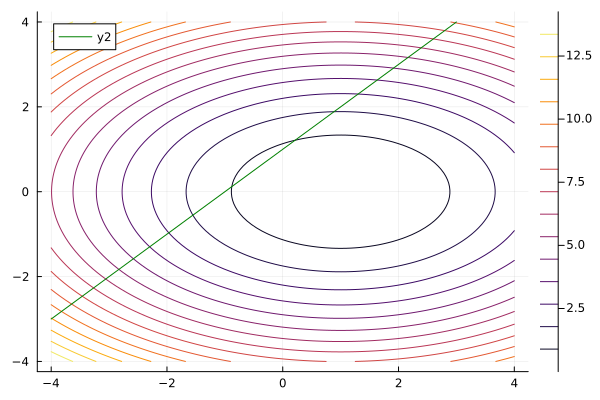

In [6]:
function plot_landscape()

    x = range(-4, 4, length=100)
    y = range(-4, 4, length=100)
    
    z = @. plot_f(x', y)
    Plots.contour(x, y, z)
    
    xc = LinRange(-4, 3, 100)
    Plots.plot!(xc, xc.+1, color=:"green")
end

plot_landscape()

## Normal Newton Solve

In [7]:
function newton_solve(x0, λ, ρ)

    x = x0
    p = max.(0, c(x))
    
    C = zeros(1, 2)
    if c(x) ≥ 0
        C = ∂c(x)
    end

    # Calculate Gradient and Hessian only about the "x"
    ∇L = ∇f(x) + C' * λ + ρ * C' * p 
    ∇²L = ∇²f(x) + ρ * C' * C

    while norm(∇L) > 1e-8
        # update x, newton method
        Δx = - ∇²L \ ∇L
        x = x + Δx

        # Calculate new Gradient and Hessian
        p = max.(0, c(x))
        
        C = zeros(1, 2)
        if c(x) ≥ 0
            C = ∂c(x)
        end

        ∇L = ∇f(x) + C' * λ + ρ * C' * p 
        ∇²L = ∇²f(x) + ρ * C' * C
    end

    return x
end

newton_solve (generic function with 1 method)

# Switch on ρ update and λ update

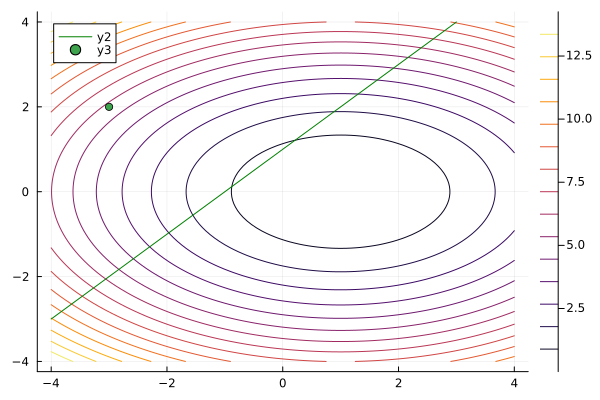

In [7]:
xguess = [-3; 2]
λguess = [0.0]
ρ = 1.0
plot_landscape()
scatter!([xguess[1]], [xguess[2]])

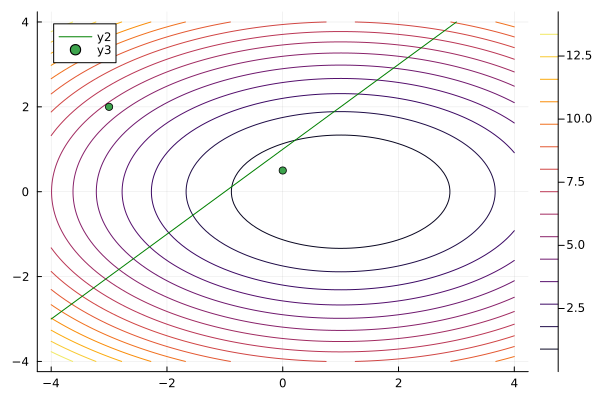

In [8]:
newx = newton_solve(xguess[:,end], λguess[end], ρ)
xguess = [xguess newx]

newλ = λguess[end] + ρ * max.(0, c(newx))
λguess = [λguess newλ]
ρ = 10 * ρ

plot_landscape()
scatter!( xguess[1,:], xguess[2,:])

In [9]:
@show xguess
@show λguess

xguess = [-3.0 0.0; 2.0 0.5]
λguess = [0.0 0.5]


1×2 Matrix{Float64}:
 0.0  0.5

## Apply Merit Function

In [8]:
p = 1.0

function P(x, λ)
    # Julia Norm Function
    # https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.norm
    return f(x) + λ'*c(x) + 0.5*p*c(x)'*c(x)
end

function ∇P(x, λ)
    return ∇f(x) + ∂c(x)'*λ + ∂c(x)'*p*c(x)
end

∇P (generic function with 1 method)

In [9]:
function newton_solve_merit_function(x0, λ, ρ)

    α = 1.0
    θ = 0.5
    p = 0.1

    x = x0
    p = max.(0, c(x))
    
    C = zeros(1, 2)
    if c(x) ≥ 0
        C = ∂c(x)
    end

    # Calculate Gradient and Hessian only about the "x"
    ∇L = ∇f(x) + C' * λ + ρ * C' * p 
    ∇²L = ∇²f(x) + ρ * C' * C

    while norm(∇L) > 1e-8
        # update x, newton method
        Δx = vec(-∇²L\∇L)

        # while P(x + α*Δx, λ) > P(x, λ) + p*α*dot(∇P(x, λ), Δx)
        #     α = α * θ
        #     @show α
        # end

        x = x + α * Δx

        # Calculate new Gradient and Hessian
        p = max.(0, c(x))
        
        C = zeros(1, 2)
        if c(x) ≥ 0
            C = ∂c(x)
        end

        ∇L = ∇f(x) + C' * λ + ρ * C' * p 
        ∇²L = ∇²f(x) + ρ * C' * C
    end

    return x
end

newton_solve_merit_function (generic function with 1 method)

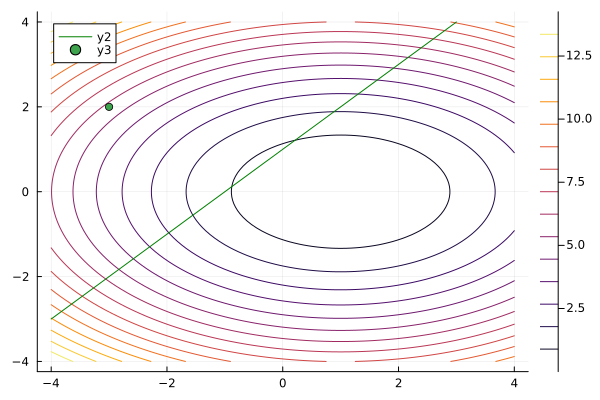

In [10]:
xguess = [-3; 2]
λguess = [0.0]
ρ = 1.0
plot_landscape()
scatter!([xguess[1]], [xguess[2]])

In [ ]:
newx = newton_solve_merit_function(xguess[:,end], λguess[end], ρ)


In [ ]:
newx = newton_solve_merit_function(xguess[:,end], λguess[end], ρ)
xguess = [xguess newx]

# newλ = λguess[end] + ρ * max.(0, c(newx))
# λguess = [λguess newλ]
# ρ = 10 * ρ

plot_landscape()
scatter!( xguess[1,:], xguess[2,:])

In [73]:
xguess

2×6 Matrix{Float64}:
 -3.0  0.961165   0.961165   0.961165   0.961165   0.961165
  2.0  0.0194175  0.0194175  0.0194175  0.0194175  0.0194175